In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
iris = sns.load_dataset('iris')
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


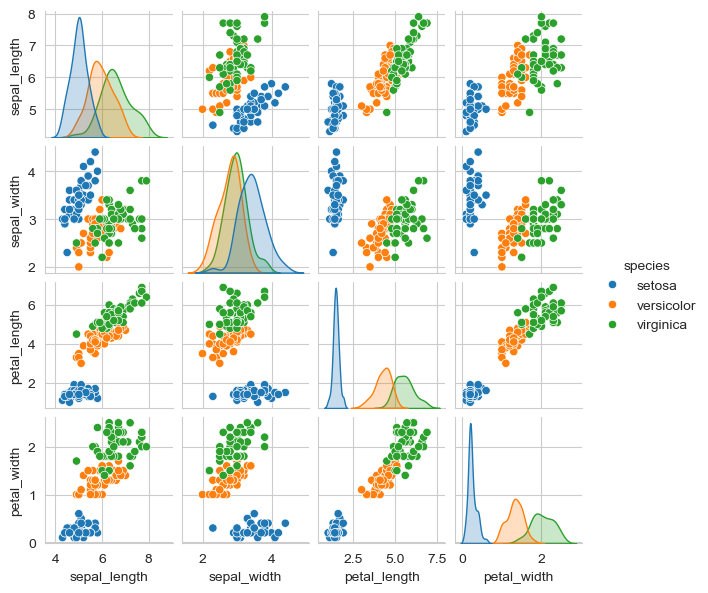

In [4]:
sns.pairplot(iris, hue='species', height=1.5)
plt.show()

In [5]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
display(X_iris.shape, y_iris.shape)

(150, 4)

(150,)

In [6]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50)
display(x.shape, y.shape)

(50,)

(50,)

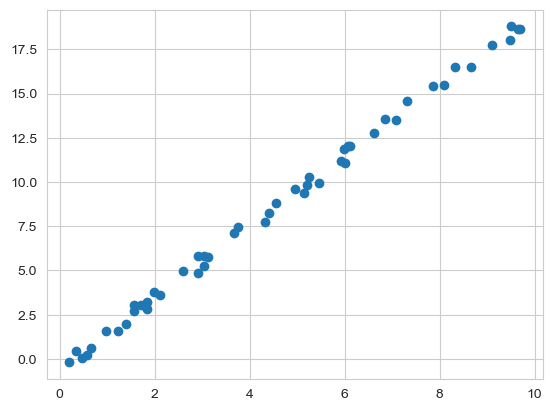

In [7]:
plt.scatter(x, y)
plt.show()

In [8]:
#Basics of the API in sckit learn
# 1. choose a class model
from sklearn.linear_model import LinearRegression

In [9]:
# 2. choose model hyperparameter
"""
Depending on the model class we are working with, we might need to answer one or
 more questions like the following:
 • Would we like to fit for the offset (i.e., y-intercept)?
 • Would we like the model to be normalized?
 • Would we like to preprocess our features to add model flexibility?
 • What degree of regularization would we like to use in our model?
 • How many model components would we like to use?

 These are examples of the important choices that must be made once the model class is
 selected. These choices are often represented as hyperparameters, or parameters that
 must be set before the model is fit to data
 """
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [10]:
# 3. Arrange data into a features matrix and target vector
# Here our target variable y is already in the correct form (a length-n_samples array), but we need to
# massage the data x to make it a matrix of size [n_samples, n_features].
X = x[:, np.newaxis]
X.shape

(50, 1)

In [11]:
# 4. Fit the model to the data
#its time to apply our model to the data using  the .fit() method
model.fit(X, y)

LinearRegression()

In [12]:
""" 
 These two parameters represent the slope and intercept of the simple linear fit to the
 data. Comparing the results to the data definition, we see that they are close to the
 values used to generate the data: a slope of 2 and intercept of –0.5.
 """
display(model.coef_, model.intercept_)

array([2.00660766])

np.float64(-0.5350275750800026)

In [13]:
#5. Predict labels for unknown data
# Once the model is trained, the main task of supervised machine learning is to evaluate 
# it based on what it says about new data that was not part of the training set. This can be done using the .predict

"""
 • For supervised learning, often we predict labels for unknown data using the predict method.
 • For unsupervised learning, we often transform or infer properties of the data
 using the transform or predict method.
 """
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

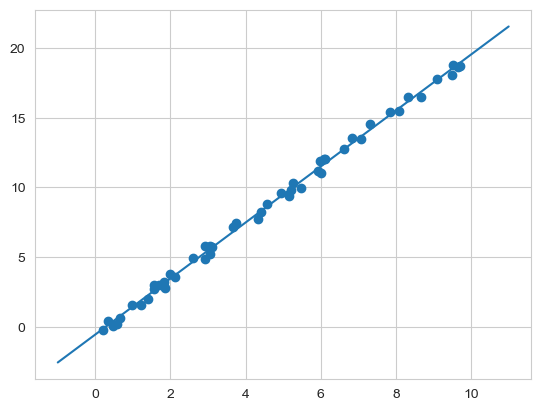

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

In [15]:
#in our iris dataset we want to classify the data into different species using the Gausian naive bayes model that classify data
# depending on samples that the data has. we are going to split the data in training and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=1)


In [16]:
#follow the recipe to predict the labels
from sklearn.naive_bayes import GaussianNB #choose a model
model = GaussianNB()                       #Instantiate the model
model.fit(X_train, y_train)                #fit the model todata
y_pred = model.predict(X_test)              #predict on new data


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9736842105263158

In [18]:
#iris dimensionality
from sklearn.decomposition import PCA #choose the model
model = PCA(n_components=2)           #instantitate the data
model.fit(X_iris)                     #fit model to data
X_2D = model.transform(X_iris)        #tranform the data


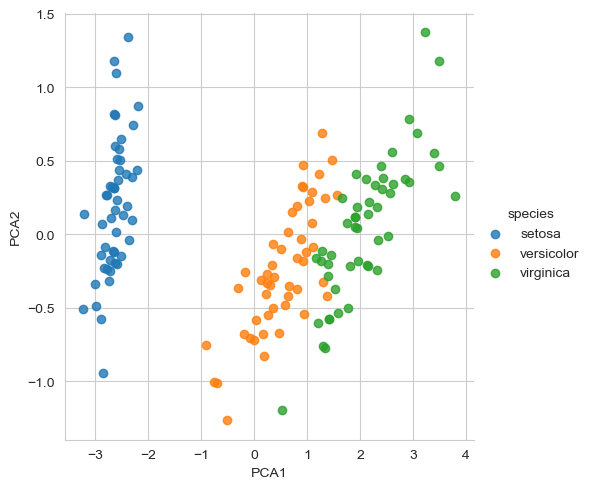

In [19]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);
plt.show()

In [22]:
from sklearn.mixture import GaussianMixture                     #import the model
model = GaussianMixture(n_components=3, covariance_type='full') #instantiate the model
model.fit(X_iris)                                               #fit model to the data
y_gmm = model.predict(X_iris)                                    #Determine the labels
y_gmm

C:\Users\Hp\miniconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

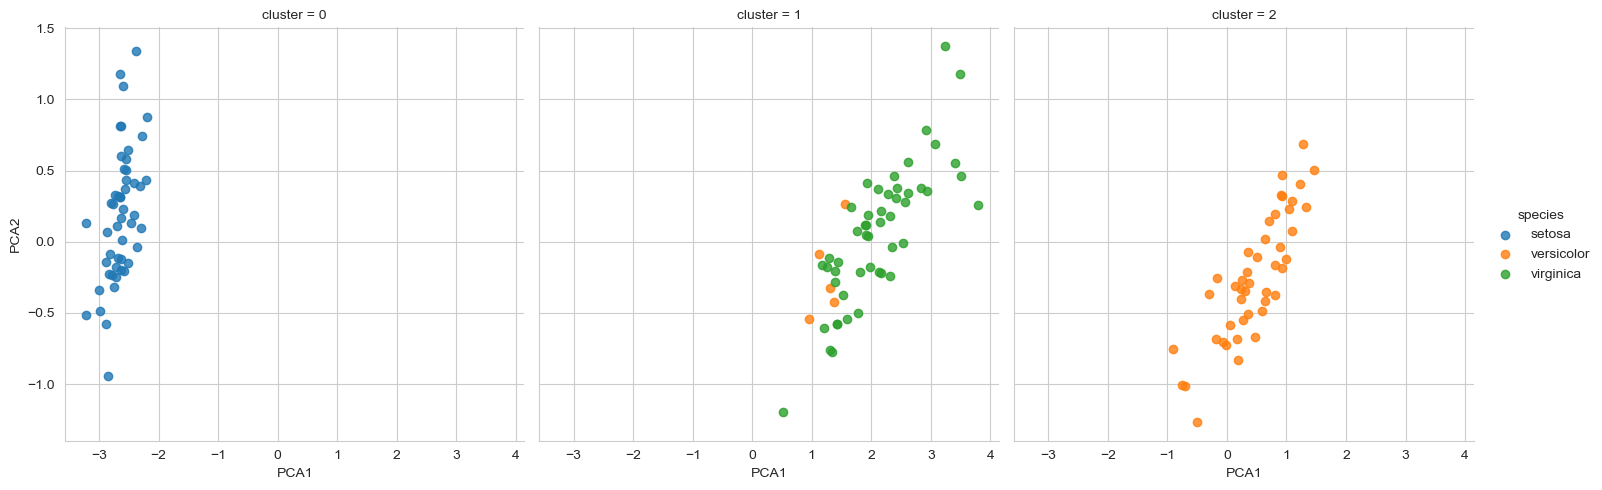

In [25]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species', col='cluster', fit_reg=False);
plt.show()

In [34]:
iris[50:60]

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
50,7.0,3.2,4.7,1.4,versicolor,1.284826,0.685160,2
51,6.4,3.2,4.5,1.5,versicolor,0.932489,0.318334,2
52,6.9,3.1,4.9,1.5,versicolor,1.464302,0.504263,2
53,5.5,2.3,4.0,1.3,versicolor,0.183318,-0.827959,2
54,6.5,2.8,4.6,1.5,versicolor,1.088103,0.074591,2
55,5.7,2.8,4.5,1.3,versicolor,0.641669,-0.418247,2
56,6.3,3.3,4.7,1.6,versicolor,1.095061,0.283468,2
57,4.9,2.4,3.3,1.0,versicolor,-0.749123,-1.004891,2
58,6.6,2.9,4.6,1.3,versicolor,1.044132,0.228362,2
59,5.2,2.7,3.9,1.4,versicolor,-0.008745,-0.723082,2


In [35]:
#Exploring handwritten digits
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

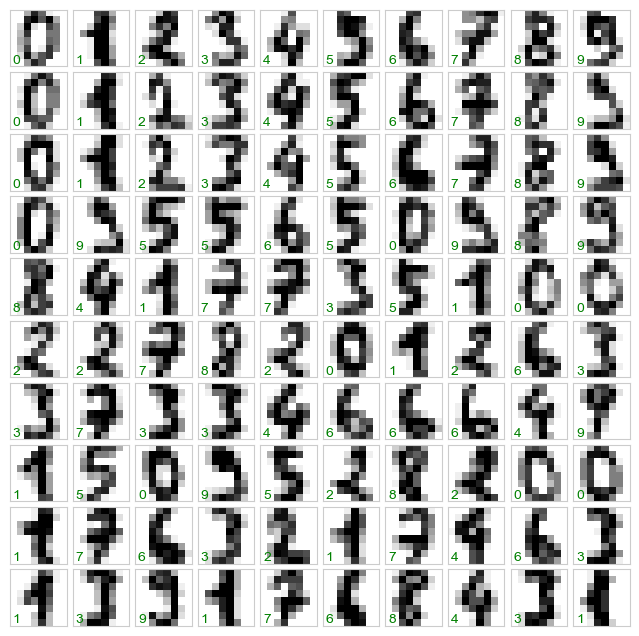

In [38]:
fig, axes = plt.subplots(10, 10, 
                      figsize=(8, 8),  
                      subplot_kw={'xticks':[], 'yticks':[]},  
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))

for  i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')
fig
    

In [44]:
# from this datasets we need to get the feature matrix([n_samples, n_features])=x and target array([n_samples, ])=y.
# This are builts in with the data and target attributes
# This will helps us to work with the digits data(load_digits)
X = digits.data
y =  digits.target

display(f'X : {X.shape} - feature matrix', f'y : {y.shape} - target array')

'X : (1797, 64) - feature matrix'

'y : (1797,) - target array'

In [47]:
Y = y[:, np.newaxis]
Y.shape

(1797, 1)

In [50]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2, n_neighbors=10)
model.fit(X)
data_projected = model.transform(X)
data_projected.shape

(1797, 2)

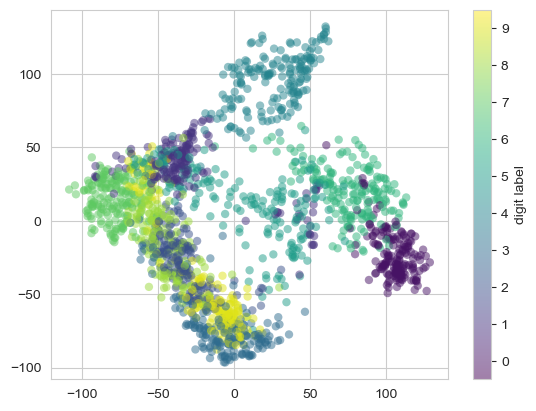

In [54]:
plt.scatter(data_projected[:, 0], 
            data_projected[:, 1], 
            c=digits.target, 
            edgecolor='none', 
            alpha=0.5,
            cmap=plt.colormaps['viridis'])
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);
plt.show()

In [55]:
#classification on digits
#first lets spilt the data into train and test data using the train_test_split that imported earlier from sklearn.model_selection
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [56]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)


In [57]:
#now that we have the model prediction we can gause the accuracy score using accuracy_score
accuracy_score(y_pred, ytest)

0.8333333333333334

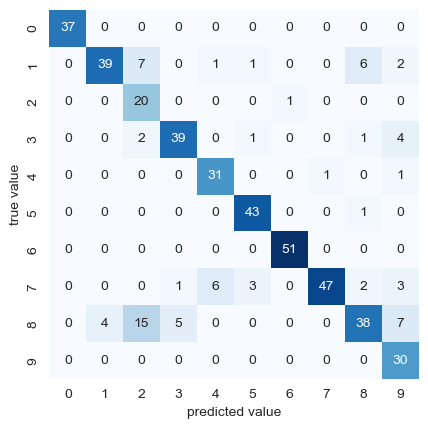

In [58]:
# We see that the accuracy is 83% but this doesn't tell us where we have gone wrong
# we can do this with the confussion matrix by importing it from sklearn.metrics
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_pred, ytest)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

plt.show()

A confusion matrix showing the frequency of misclassifications by our classifier

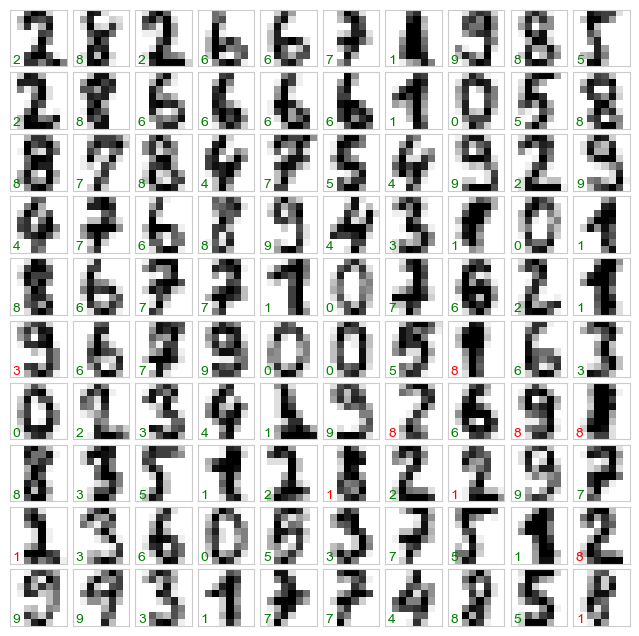

In [63]:
"""
Another way to gain intuition into the characteristics of the model is to plot the
 inputs again, with their predicted labels. We’ll use green for correct labels and red for incorrect labels;
 """

fig, axes = plt.subplots(10, 10, figsize=(8,8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_pred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_pred[i]) else 'red')
plt.show()